#**PMR 3508 - Aprendizado de Máquina e Reconhecimento de Padrões**

### **Exercício Programa 01:** Aplicação do KNN (K Nearest Neighbors) utilizando a base de dados Adult.

Autor: Vítor Garcia Comissoli

NUSP: 11910411

Hash code: 109

Data: 23/09/2024

## **Links relevantes:**

*   Link para o GitHub: https://github.com/Vitor-Garcia-Comissoli/Codes_from_PMR3508
*   Link para a pasta do Google Drive: https://drive.google.com/drive/folders/1xQETUZHZYIxc4ms2SAU94QoTtm-IOCAq?usp=sharing

### **Input dos arquivos necessários:**

##### **Input pelo Google Drive:**
Inicialmente, deve ser criado um atalho da pasta do Google Drive (fornecida através do link anteriormente) para o Drive do usuário. Em seguida, através do código a seguir, o Google Colab é conectado ao Drive, é montada uma pasta e alterado o diretório da pasta.

##### **Input da pasta baixada localmente:**
Alternativamente, caso tenha baixado o .ipynb, estabelecer uma path para a pasta "EP01" (encontrada no repositório do GitHub).

In [186]:
# Montando a pasta:
from google.colab import drive
drive.mount('/content/gdrive')

path = '/content/gdrive/My Drive/Décimo Semestre/PMR 3508/EP01'

# Descomentar essa linha, e comentar a anterior, após copiar a pasta para o drive pessoal:
# path = '/content/gdrive/My Drive/EP01'

# Descomentar essa linha, e comentar as anteriores, para usar o arquivo baixado nativamente:
# path = 'F:/Downloads/EP01'

# Alterando o diretório:
import os
os.chdir(path)

# Listando os arquivos do diretório:
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
PMR3508_2024_109_Adult_KNN.ipynb  test_data.csv  train_data.csv


In [187]:
# Instalação da biblioteca "ucimlrepo"

In [188]:
pip install ucimlrepo

In [189]:
# Importação das bibliotecas
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import ucimlrepo

###**Impotando a base de treino:**

In [190]:
# Descomentar essas linhas, e comentar as próximas, para usar a base oriunda do Drive:
'''
treino = pd.read_csv('train_data.csv', na_values="?", names=[
        "id", "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
        "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
        "hours-per-week", "native-country", "income"])
treino = treino.drop(0)
treino = treino.drop(columns=["id"])
%load_ext google.colab.data_table
%reload_ext google.colab.data_table
drive = True
treino
'''

# Descomentar essas linhas, e comentar as anteriores, para usar a base oriunda da biblioteca "ucimlrepo":
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
adult = fetch_ucirepo(id=2)
df = pd.merge(adult.data.features, adult.data.targets, left_index=True, right_index=True)
df['income'] = df['income'].replace({'<=50K.': '<=50K', '>50K.': '>50K'})
treino, teste = train_test_split(df, test_size=0.3, random_state=42)
drive = False
treino

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
42392,19,NaN,171578,Some-college,10,Never-married,NaN,Own-child,Black,Male,0,0,40,United-States,<=50K
14623,32,Private,281030,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
27411,43,Private,75993,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,7688,0,40,United-States,>50K
1288,37,Private,37238,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,45,United-States,<=50K
7078,42,Federal-gov,25240,Assoc-voc,11,Divorced,Prof-specialty,Unmarried,Amer-Indian-Eskimo,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,35,Private,200117,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,1887,50,?,>50K
44732,21,Private,90896,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Female,0,0,40,United-States,<=50K
38158,23,Private,370057,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
860,18,Private,216284,11th,7,Never-married,Adm-clerical,Own-child,White,Female,0,0,20,United-States,<=50K


In [191]:
treino.shape

(34189, 15)

###**Análise Descritiva**:

Uma breve análise descritiva (com tabelas e gráficos) da base de treino.

In [192]:
treino["native-country"].value_counts()

,count
native-country,
United-States,30755
Mexico,647
?,405
Philippines,212
Germany,144
Puerto-Rico,128
Canada,124
India,110
Cuba,99


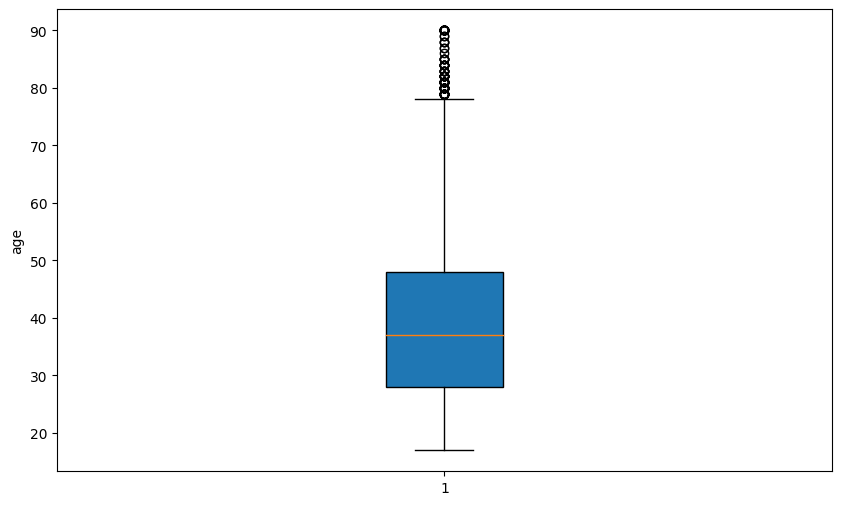

In [193]:
plt.figure(figsize=(10, 6))
plt.boxplot(treino["age"], patch_artist=True)
plt.ylabel('age')
plt.show()

<Axes: xlabel='sex'>

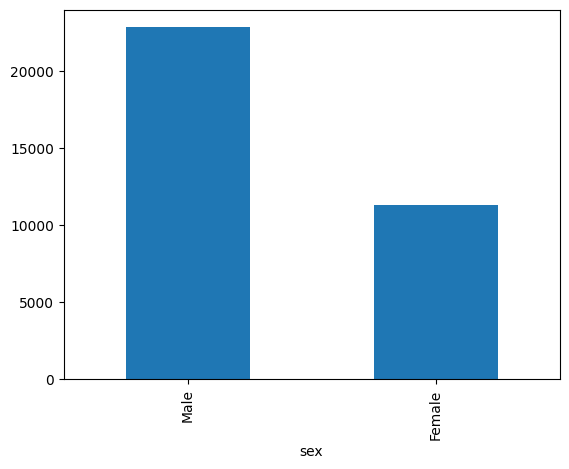

In [194]:
treino["sex"].value_counts().plot(kind="bar")

<Axes: xlabel='race'>

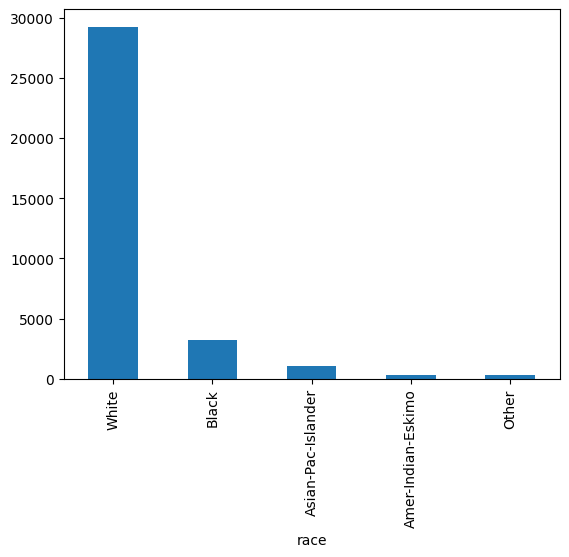

In [195]:
treino["race"].value_counts().plot(kind="bar")

<Axes: xlabel='workclass'>

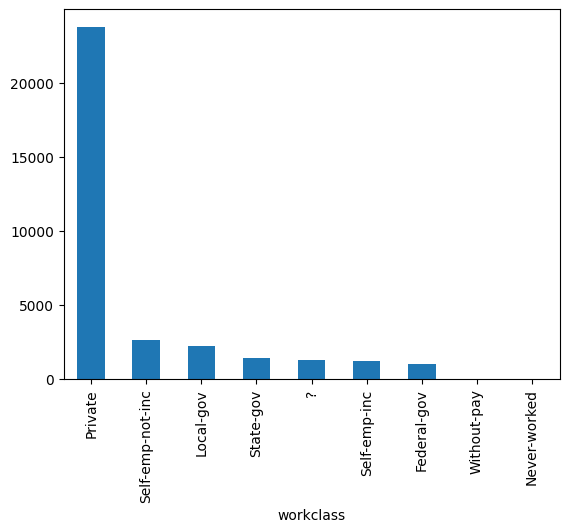

In [196]:
treino["workclass"].value_counts().plot(kind="bar")

<Axes: xlabel='education'>

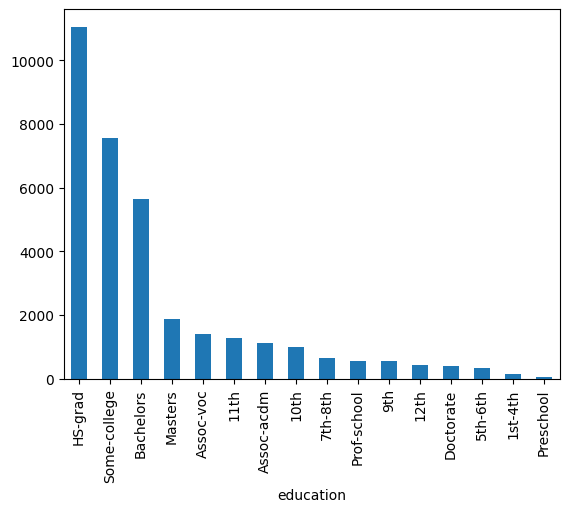

In [197]:
treino["education"].value_counts().plot(kind="bar")

<Axes: xlabel='occupation'>

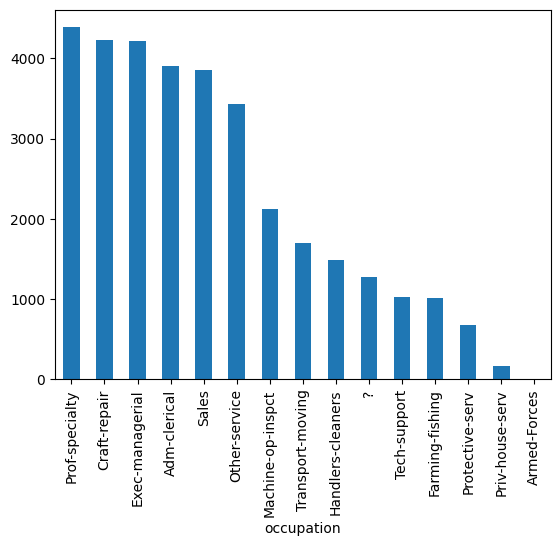

In [198]:
treino["occupation"].value_counts().plot(kind="bar")

<Axes: xlabel='marital-status'>

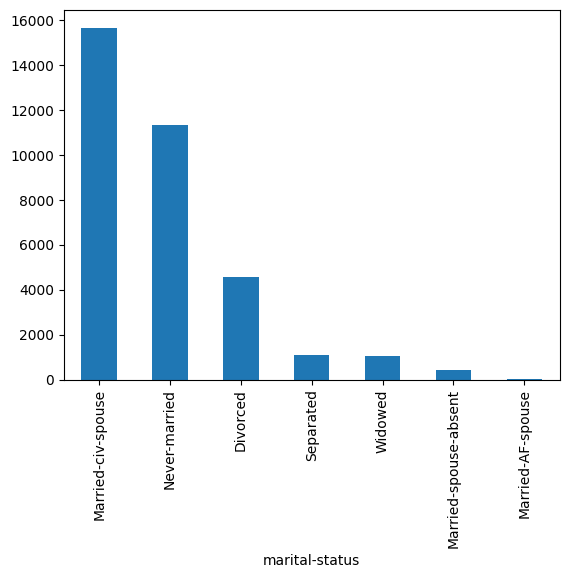

In [199]:
treino["marital-status"].value_counts().plot(kind="bar")

<Axes: xlabel='relationship'>

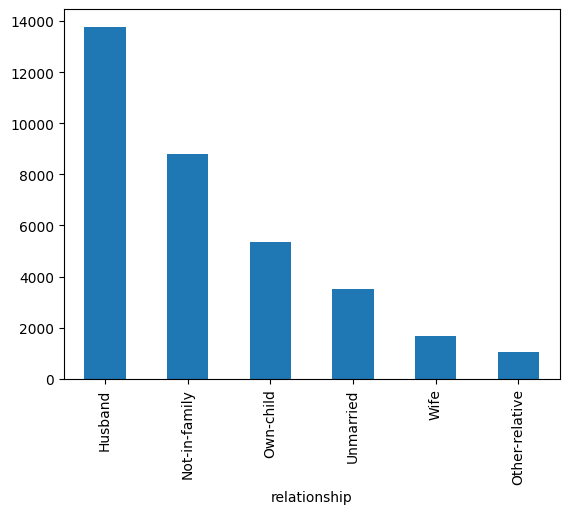

In [200]:
treino["relationship"].value_counts().plot(kind="bar")

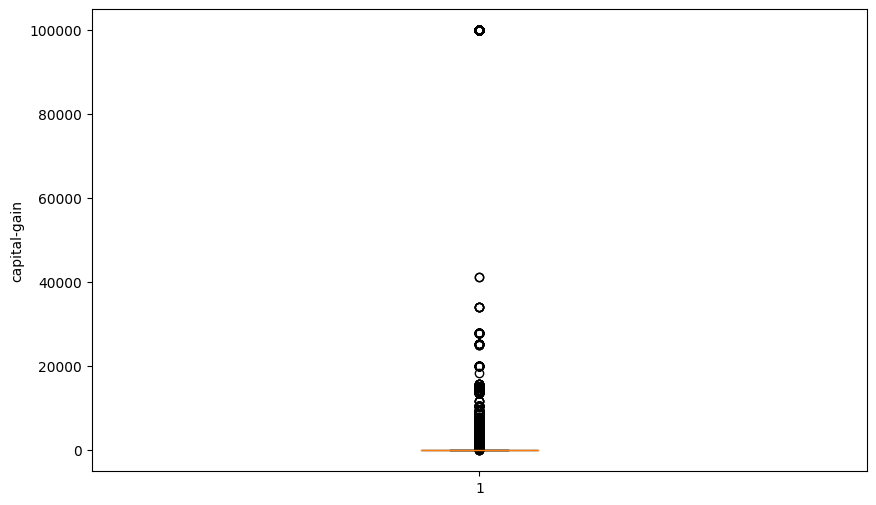

In [201]:
plt.figure(figsize=(10, 6))
plt.boxplot(treino["capital-gain"], patch_artist=True)
plt.ylabel('capital-gain')
plt.show()

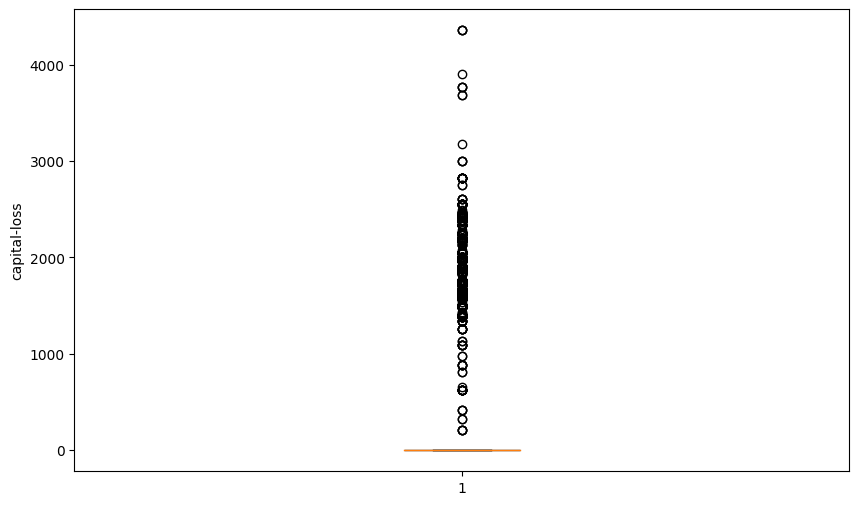

In [202]:
plt.figure(figsize=(10, 6))
plt.boxplot(treino["capital-loss"], patch_artist=True)
plt.ylabel('capital-loss')
plt.show()

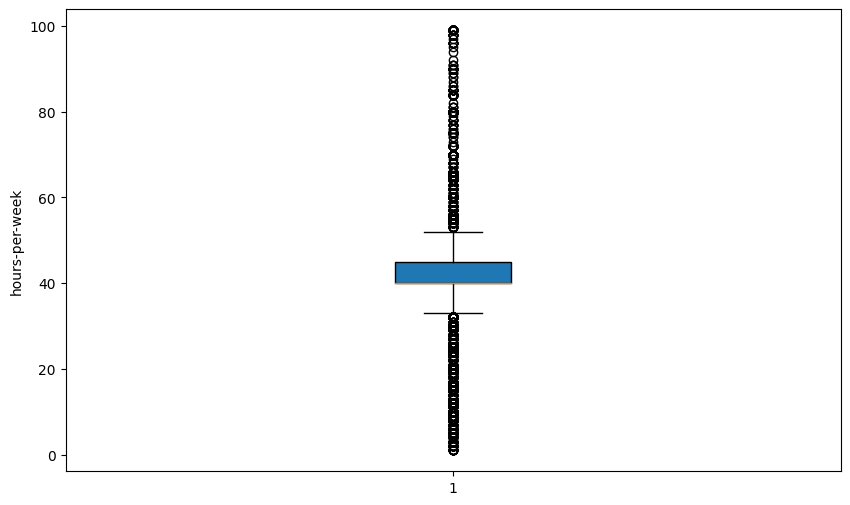

In [203]:
plt.figure(figsize=(10, 6))
plt.boxplot(treino["hours-per-week"], patch_artist=True)
plt.ylabel('hours-per-week')
plt.show()

Observa-se que as variáveis acima apresentam uma variância muito alta, além de uma altíssima presença de outliers (como apresentado nos boxplots acima), portanto o uso delas na predição por kNN deve ser analizado com cuidado.

<Axes: xlabel='income'>

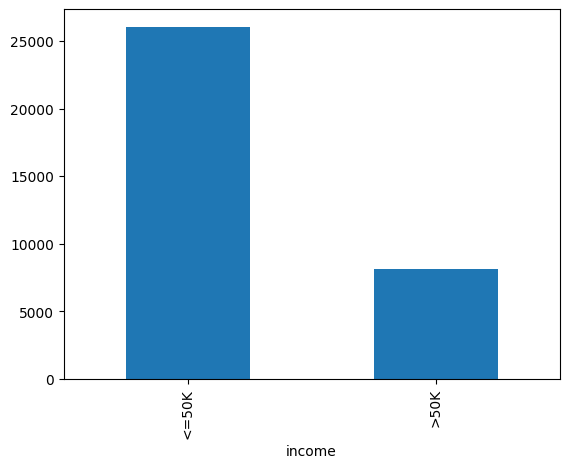

In [204]:
treino["income"].value_counts().plot(kind="bar")

In [205]:
(treino["income"].value_counts())/len(treino["income"])*100

,count
income,
<=50K,76.182398
>50K,23.817602


Observa-se acima a porcentagem que cada uma das categorias da variável income representam na base de treino.

###**Lidando com os dados faltantes:**

Serão geradas duas novas bases de dados, onde na primeira serão retiradas todas as linhas que contém NA, e na segundo, os valores de NA serão substituidos pela média (ou moda, no caso de variáveis categóricas).

In [206]:
# Defininfo função que subistitui NAs diferentemente, dependendo do tipo da variável de cada coluna.
def fill_na_with_mean_or_mode(df):
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            # Replace NaN in numeric columns with the mean
            df[col].fillna(df[col].mean(), inplace=True)
        else:
            # Replace NaN in non-numeric columns with the mode (most frequent value)
            df[col].fillna(df[col].mode()[0], inplace=True)
    return df

In [207]:
treino_1 = treino.dropna()
treino_2 = fill_na_with_mean_or_mode(treino)

In [208]:
treino.shape

(34189, 15)

In [209]:
treino_1.shape

(33341, 15)

In [210]:
treino_2.shape

(34189, 15)

In [211]:
treino_1

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
14623,32,Private,281030,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
27411,43,Private,75993,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,7688,0,40,United-States,>50K
1288,37,Private,37238,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,45,United-States,<=50K
7078,42,Federal-gov,25240,Assoc-voc,11,Divorced,Prof-specialty,Unmarried,Amer-Indian-Eskimo,Female,0,0,40,United-States,<=50K
30880,37,Private,199753,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,35,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,35,Private,200117,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,1887,50,?,>50K
44732,21,Private,90896,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Female,0,0,40,United-States,<=50K
38158,23,Private,370057,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
860,18,Private,216284,11th,7,Never-married,Adm-clerical,Own-child,White,Female,0,0,20,United-States,<=50K


In [212]:
treino_2

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
42392,19,Private,171578,Some-college,10,Never-married,Prof-specialty,Own-child,Black,Male,0,0,40,United-States,<=50K
14623,32,Private,281030,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
27411,43,Private,75993,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,7688,0,40,United-States,>50K
1288,37,Private,37238,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,45,United-States,<=50K
7078,42,Federal-gov,25240,Assoc-voc,11,Divorced,Prof-specialty,Unmarried,Amer-Indian-Eskimo,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,35,Private,200117,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,1887,50,?,>50K
44732,21,Private,90896,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Female,0,0,40,United-States,<=50K
38158,23,Private,370057,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
860,18,Private,216284,11th,7,Never-married,Adm-clerical,Own-child,White,Female,0,0,20,United-States,<=50K


###**Impotando a base de teste:**

In [213]:
# Descomentar essas linhas, e comentar a próxima, para usar a base oriunda do Drive:
'''
teste = pd.read_csv('test_data.csv', na_values="?", names=[
        "id", "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
        "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
        "hours-per-week", "native-country"])
teste = teste.drop(0)
teste = teste.drop(columns=["id"])
%load_ext google.colab.data_table
%reload_ext google.colab.data_table
teste
'''

# Descomentar essa linha, e comentar as anteriores, para usar a base oriunda da biblioteca "ucimlrepo":
teste

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
7762,18,Private,423024,HS-grad,9,Never-married,Other-service,Not-in-family,White,Male,0,0,20,United-States,<=50K
23881,17,Private,178953,12th,8,Never-married,Sales,Own-child,White,Female,0,0,20,United-States,<=50K
30507,25,Local-gov,348986,HS-grad,9,Never-married,Handlers-cleaners,Other-relative,Black,Male,0,0,40,United-States,<=50K
28911,20,Private,218215,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,United-States,<=50K
19484,47,Private,244025,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,Amer-Indian-Eskimo,Male,0,0,56,Puerto-Rico,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15938,53,Self-emp-not-inc,158284,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,70,United-States,<=50K
27828,37,Self-emp-not-inc,286146,HS-grad,9,Married-spouse-absent,Other-service,Unmarried,Black,Female,0,0,40,United-States,<=50K
28449,61,Private,227468,HS-grad,9,Divorced,Adm-clerical,Unmarried,Black,Female,0,0,40,United-States,<=50K
5647,30,Private,164190,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,38,?,<=50K


In [214]:
treino.shape

(34189, 15)

###**Lidando com os dados faltantes:**

Analogamente ao caso anterior, temos:

In [215]:
teste_1 = teste.dropna()
teste_2 = fill_na_with_mean_or_mode(teste)

In [216]:
teste.shape

(14653, 15)

In [217]:
teste_1.shape

(14280, 15)

In [218]:
teste_2.shape

(14653, 15)

In [219]:
teste_1

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
7762,18,Private,423024,HS-grad,9,Never-married,Other-service,Not-in-family,White,Male,0,0,20,United-States,<=50K
23881,17,Private,178953,12th,8,Never-married,Sales,Own-child,White,Female,0,0,20,United-States,<=50K
30507,25,Local-gov,348986,HS-grad,9,Never-married,Handlers-cleaners,Other-relative,Black,Male,0,0,40,United-States,<=50K
28911,20,Private,218215,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,United-States,<=50K
19484,47,Private,244025,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,Amer-Indian-Eskimo,Male,0,0,56,Puerto-Rico,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15938,53,Self-emp-not-inc,158284,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,70,United-States,<=50K
27828,37,Self-emp-not-inc,286146,HS-grad,9,Married-spouse-absent,Other-service,Unmarried,Black,Female,0,0,40,United-States,<=50K
28449,61,Private,227468,HS-grad,9,Divorced,Adm-clerical,Unmarried,Black,Female,0,0,40,United-States,<=50K
5647,30,Private,164190,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,38,?,<=50K


In [220]:
teste_2

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
7762,18,Private,423024,HS-grad,9,Never-married,Other-service,Not-in-family,White,Male,0,0,20,United-States,<=50K
23881,17,Private,178953,12th,8,Never-married,Sales,Own-child,White,Female,0,0,20,United-States,<=50K
30507,25,Local-gov,348986,HS-grad,9,Never-married,Handlers-cleaners,Other-relative,Black,Male,0,0,40,United-States,<=50K
28911,20,Private,218215,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,United-States,<=50K
19484,47,Private,244025,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,Amer-Indian-Eskimo,Male,0,0,56,Puerto-Rico,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15938,53,Self-emp-not-inc,158284,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,70,United-States,<=50K
27828,37,Self-emp-not-inc,286146,HS-grad,9,Married-spouse-absent,Other-service,Unmarried,Black,Female,0,0,40,United-States,<=50K
28449,61,Private,227468,HS-grad,9,Divorced,Adm-clerical,Unmarried,Black,Female,0,0,40,United-States,<=50K
5647,30,Private,164190,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,38,?,<=50K


##kNN: k=2

Primeiramente, a título de teste do método, fixemos k=2 e um cross-validation de 10.

Usou-se também somente variáveis númericas.

In [221]:
Xtreino_1 = treino_1[["age","education-num","capital-gain", "capital-loss", "hours-per-week"]]
Xtreino_2 = treino_2[["age","education-num","capital-gain", "capital-loss", "hours-per-week"]]

Ytreino_1 = treino_1.income
Ytreino_2 = treino_2.income

In [222]:
Xteste_1 = teste_1[["age","education-num","capital-gain", "capital-loss", "hours-per-week"]]
Xteste_2 = teste_2[["age","education-num","capital-gain", "capital-loss", "hours-per-week"]]

if drive == False:
  Yteste_1 = teste_1.income
  Yteste_2 = teste_2.income

In [223]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)

In [224]:
from sklearn.model_selection import cross_val_score
scores_1 = pd.DataFrame(cross_val_score(knn, Xtreino_1, Ytreino_1, cv=10))
scores_2 = pd.DataFrame(cross_val_score(knn, Xtreino_2, Ytreino_2, cv=10))

In [225]:
scores_1

,0
0,0.827586
1,0.821836
2,0.830834
3,0.818236
4,0.818236
5,0.820636
6,0.829634
7,0.830534
8,0.828134
9,0.824835


In [226]:
scores_2

,0
0,0.828312
1,0.829190
2,0.828312
3,0.822755
4,0.821293
5,0.822463
6,0.830652
7,0.831822
8,0.829775
9,0.819778


In [227]:
knn.fit(Xtreino_1,Ytreino_1)
knn.fit(Xtreino_2,Ytreino_2)

KNeighborsClassifier(n_neighbors=2)

In [228]:
YtestePred_1 = pd.DataFrame(knn.predict(Xteste_1))
YtestePred_2 = pd.DataFrame(knn.predict(Xteste_2))

In [229]:
YtestePred_1

,0
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,>50K
...,...
14275,<=50K
14276,<=50K
14277,<=50K
14278,<=50K


In [230]:
YtestePred_2

,0
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,>50K
...,...
14648,<=50K
14649,<=50K
14650,<=50K
14651,<=50K


Caso a database inputada tenha sido a da biblioteca "ucimlrepo", é possível calcular a acurária do modelo, como apresentada abaixo:

In [231]:
if drive == False:
  from sklearn.metrics import accuracy_score
  acurácia_1 = accuracy_score(Yteste_1,YtestePred_1)
  acurácia_2 = accuracy_score(Yteste_2,YtestePred_2)
else:
  acurácia_1 = "Não calculável"
  acurácia_2 = "Não calculável"

In [232]:
acurácia_1

0.8252801120448179

In [233]:
acurácia_2

0.8272708660342591

Observou-se que a acurária foi menor no modelo que retirou as linhas onde existiam NAs que no modelo onde os NAs foram subistituiídos pela média (ou pela moda). Dado isso, para os próximos modelos, se usará somente a segunda opção.

##kNN: k=100

Agora, fixemos k=100 e um cross-validation de 100.

Converteu-se também as variáveis categóricas em numéricas, para que elas possam ser utilizadas no modelo.

In [234]:
from sklearn import preprocessing
treino_2 = treino_2.apply(preprocessing.LabelEncoder().fit_transform)
teste_2 = teste_2.apply(preprocessing.LabelEncoder().fit_transform)

In [235]:
Xtreino_2 = treino_2[["age", "workclass", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country"]]

Ytreino_2 = treino_2.income

In [236]:
Xteste_2 = teste_2[["age", "workclass", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country"]]

if drive == False:
  Yteste_2 = teste_2.income

In [237]:
knn = KNeighborsClassifier(n_neighbors=100)

In [238]:
scores_2 = pd.DataFrame(cross_val_score(knn, Xtreino_2, Ytreino_2, cv=100))

In [239]:
knn.fit(Xtreino_2,Ytreino_2)

KNeighborsClassifier(n_neighbors=100)

In [240]:
YtestePred_2 = pd.DataFrame(knn.predict(Xteste_2))

In [241]:
YtestePred_2

,0
0,0
1,0
2,0
3,0
4,0
...,...
14648,0
14649,0
14650,0
14651,0


In [242]:
if drive == False:
  acurácia_2 = accuracy_score(Yteste_2,YtestePred_2)
else:
  acurácia_2 = "Não calculável"

In [243]:
acurácia_2

0.8317068177165086

##kNN: k=50

Agora, fixemos k=50 e permanecemos um cross-validation de 100.

Retirou-se também as 3 variáveis cuja variância e presença de outliers se mostrou muito alta (como apresentado nos boxplots).

In [244]:
Xtreino_2 = treino_2[["age", "workclass", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "native-country"]]

In [245]:
Xteste_2 = teste_2[["age", "workclass", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "native-country"]]

In [246]:
knn = KNeighborsClassifier(n_neighbors=50)

In [247]:
scores_2 = pd.DataFrame(cross_val_score(knn, Xtreino_2, Ytreino_2, cv=100))

In [248]:
knn.fit(Xtreino_2,Ytreino_2)

KNeighborsClassifier(n_neighbors=50)

In [249]:
YtestePred_2 = pd.DataFrame(knn.predict(Xteste_2))

In [250]:
if drive == False:
  acurácia_2 = accuracy_score(Yteste_2,YtestePred_2)
else:
  acurácia_2 = "Não calculável"

In [251]:
acurácia_2

0.81628335494438

Dado que o modelo encontrado se mostrou pior que o anterior, realizou-se ainda mais uma modelagem.

##kNN: k=25

Agora, fixemos k=25 e um cross-validation de 20.

Escolheu-se também uma nova combinação de variáveis para fazer parte do modelo.

In [252]:
Xtreino_2 = treino_2[["age", "workclass", "education-num", "marital-status", "occupation", "relationship", "sex", "capital-gain", "capital-loss", "hours-per-week"]]

In [253]:
Xteste_2 = teste_2[["age", "workclass", "education-num", "marital-status", "occupation", "relationship", "sex", "capital-gain", "capital-loss", "hours-per-week"]]

In [261]:
knn = KNeighborsClassifier(n_neighbors=25)

In [262]:
scores_2 = pd.DataFrame(cross_val_score(knn, Xtreino_2, Ytreino_2, cv=20))

In [263]:
knn.fit(Xtreino_2,Ytreino_2)

KNeighborsClassifier(n_neighbors=25)

In [264]:
YtestePred_2 = pd.DataFrame(knn.predict(Xteste_2))

In [265]:
if drive == False:
  acurácia_2 = accuracy_score(Yteste_2,YtestePred_2)
else:
  acurácia_2 = "Não calculável"

In [266]:
acurácia_2

0.8330717259264314

Chegamos então no melhor modelo dentre os encontrados.